In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from seaborn import violinplot
from seaborn import boxplot
from seaborn import histplot
from seaborn import countplot

##### O DataSet a ser analisado será o "Performance de estudantes", onde reúne alguns parâmetros de à classe social e notas em diferentes provas (matemática e português) de alunos reais de duas escolas brasileiras (Gabriel Pereira e Mousinho da Silveira), no ano de 2008.

##### O objetivo desta análise é entender melhor quais fatores podem contribuir mais para um determinado aluno conseguir ter um desempenho e aprendizado melhor, assim como poder prever, com um modelo simples, as notas mais prováveis de um aluno ter quando preenchendo alguns parâmetros.

##### Este DataSet foi retirado do website [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu), e pode ser acessado por este [LINK](https://archive.ics.uci.edu/dataset/320/student+performance).

### Sumário

>- 1.....................................................Importação dos DataSets.
>
>   - 1.1........................................Definição de Funções.
>    
>- 2.....................................................Dicionário de Colunas.
>
>- 3.....................................................Preparação dos Dados.
>
>- 4.....................................................Uma análise exploratória.
>
>   - 4.1........................................Algumas análises Univariadas.
>
>   - 4.2........................................Algumas análises Bivariadas.
>
>       - 4.2.1...........................Relações de Nota vs Algumas variáveis categóricas.
>
>       - 4.2.2...........................Correlações das Variáveis numéricas.
>
>       - 4.2.3...........................Comportamento das médias.
>
>- 5.....................................................Considerações finais.
>
>   - 5.1........................................Conclusões e hipóteses.
>
>   - 5.2........................................Propostas.

### Sumário de Imagens

> Gráfico 1...............................................Barras - Quantidade de cada gênero.
>
> Gráfico 2...............................................Histograma - Frequência de cada nota por trimestre.
>
> Gráfico 3...............................................Boxplot - Outliers de falta.
>
> Gráfico 4...............................................Violino - Frequência de Notas por tipo de endereço.
>
> Gráfico 5...............................................Violino - Frequência de Notas por tempo de deslocamento.
>
> Gráfico 6...............................................Violino - Frequência de Notas por suporte educacional.
>
> Gráfico 7...............................................Violino - Frequência de Notas por relação familiar.
>
> Gráfico 8...............................................Violino - Frequência de Notas por tamanho da família.
>
> Gráfico 9...............................................Mapa de Calor - Correlação das variáveis numéricas de Matemática.
>
> Gráfico 10............................................Mapa de Calor - Correlação das variáveis numéricas de Português.
>
> Gráfico 11............................................Linha - Tempo de Estudo por Média de nota.
>
> Gráfico 12............................................Barras e Linha - Quantidade de Cada educação de Pai/Mãe e Média de nota por Educação dos pais.

# 1 - Importação dos DataSets

##### Após fazer a importação dos datasets, podemos ver qual a cara dos dados, como estão escritas variáveis categóricas, se há caracteres especiais, assim como utilizar funções que nos dê uma idéia de dados faltantes.

##### No caso, podemos contar que estes datasets tem 1000 registros no total, e nenhum dos dados está nulo ou faltante, facilitando assim os próximos passos.

In [2]:
df_mat = pd.read_csv("data/student-mat.csv", sep=';')
df_por = pd.read_csv("data/student-por.csv", sep=';')
dfs = [df_mat, df_por]

In [3]:
df_mat.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11


In [4]:
df_por.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13


In [5]:
print("df_mat Info\n")
print(df_mat.info())
print("\n\ndf_por Info\n")
print(df_por.info())

df_mat Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 2

In [6]:
print("df_mat Quantidade Nulos\n")
print(df_mat.isnull().sum())
print("\n\ndf_por Quantidade Nulos\n")
print(df_por.isnull().sum())

df_mat Quantidade Nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


df_por Quantidade Nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout  

### 1.1 Definição de Funções

In [7]:
def showViolinPlot(var):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))

    sns.violinplot(x=var, y='G1', data=df_mat, ax=axes[0][0])
    sns.violinplot(x=var, y='G2', data=df_mat, ax=axes[0][1])
    sns.violinplot(x=var, y='G3', data=df_mat, ax=axes[0][2])

    sns.violinplot(x=var, y='G1', data=df_por, ax=axes[1][0])
    sns.violinplot(x=var, y='G2', data=df_por, ax=axes[1][1])
    sns.violinplot(x=var, y='G3', data=df_por, ax=axes[1][2])

    for i in range(0, 2):
        for j in range(0, 3):
            label = axes[i][j].get_xticklabels()
            ticks = axes[i][j].get_xticks()
            axes[i][j].set_xticks(ticks)
            axes[i][j].set_xlabel("")
            axes[i][j].set_xticklabels(label)

    axes[0][0].set_ylabel("Nota  1º  Trimestre  -  Matematica")
    axes[0][1].set_ylabel("Nota  2º  Trimestre  -  Matematica")
    axes[0][2].set_ylabel("Nota  3º  Trimestre  -  Matematica")
    axes[1][0].set_ylabel("Nota  1º  Trimestre  -  Portugues")
    axes[1][1].set_ylabel("Nota  2º  Trimestre  -  Portugues")
    axes[1][2].set_ylabel("Nota  3º  Trimestre  -  Portugues")
    
    plt.tight_layout(w_pad=4, h_pad=2)
    plt.show()

In [8]:
def showHeatmap(df, subject, colorPallete):
    plt.figure(figsize=(14,9))
    num = df.select_dtypes(include=['float', 'int'])
    corr = num.corr()
    matrix = np.triu(corr)
    sns.heatmap(corr, annot=True, cmap=colorPallete, mask=matrix)
    plt.title("Mapa de Calor de Correlações - " + subject, fontsize=15)
    plt.xticks(rotation=35)
    plt.yticks(rotation=0)
    plt.show()

In [9]:
def showGenderQty(df):

    bar = df['sex'].value_counts().reset_index()
    percentages = bar['count'] / bar['count'].sum() * 100

    plt.grid(False)

    return bar, percentages

# 2 - Dicionário de Colunas

#### Para o melhor entendimento do que cada uma das categorias significa no contexto da análise, é necessário um dicionário de cada uma das colunas

1) **school**.......................................Escola ("GP" = Gabriel Pereira / "MS" = Mousinho da Silveira)

2) **sex**..............................................Genero ("F" = Feminino / "M" = Masculino)
3) **age**..............................................Idade do aluno
4) **address**.....................................Tipo do endereço ("U" = Urbano / "R" = Rural)
5) **famsize**.....................................Tamanho da Família ("LE3" = 3 Pessoas ou menos / "GT3" = Mais que 3 pessoas)
6) **Pstatus**......................................Estatus dos pais ("J" = Morando juntos / "S" = Separados)
7) **Medu**.........................................Educação da Mãe (0 = Nenhum / 1 = Fundamental / 2 = Quinto até Nono ano / 3 = Colégio / 4 = Ensino Superior)
8) **Fedu**...........................................Educação do Pai (0 = Nenhum / 1 = Fundamental / 2 = Quinto até Nono ano / 3 = Colégio / 4 = Ensino Superior)
9) **Mjob**..........................................Ocupação da Mãe (Professor / Saúde / Func. Público / Lar / Outro)
10) **Fjob**............................................Ocupação do Pai (Professor / Saúde / Func. Público / Lar / Outro)
11) **reason**.......................................Razão para escolher a escola ("Local" = Perto de casa / Reputação / "Curso" = Preferencia de curso / Outro)
12) **guardian**..................................Guarda do estudante
13) **traveltime**...............................Tempo de casa até a escola (1 = Menos que 15 min / 2 = 15 a 30 min / 3 = 30 min a 1 hora / 4 = Maior que 1 hora)
14) **studytime**................................Tempo semanal de estudo (1 = Menos que 2 horas / 2 = 2 a 5 horas / 3 = 5 a 10 horas / 4 = Mais que 10 horas)
15) **failures**......................................Número de vezes que o aluno repetiu de ano
16) **schoolsup**................................Teve suporte educacional extra (Sim ou Não)
17) **famsup**......................................Teve suporte educacional familiar (Sim ou Não)
18) **paid**.............................................Teve aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (Sim ou Não)
19) **activities**...................................Teve atividades extracurriculares (Sim ou Não)
20) **nursery**......................................Frequentou creche (Sim ou Não)
21) **higher**.........................................Deseja cursar ensino superior (Sim ou Não)
22) **internet**.....................................Tem acesso à internet em casa (Sim ou Não)
23) **romantic**...................................Está em um relacionamento amoroso (Sim ou Não)
24) **famrel**........................................Qualidade das relações familiares (De 1 = Muito ruim até 5 = Excelente)
25) **freetime**....................................Tem tempo extra depois da escola (De 1 = Muito baixo até 5 = Muito alto)
26) **goout**.........................................Sai com os amigos (De 1 = Muito baixo até 5 = Muito alto)
27) **Dalc**.............................................Consumo de álcool durante a semana (De 1 = Muito baixo até 5 = Muito alto)
28) **Walc**............................................Consumo de álcool no final de semana (De 1 = Muito baixo até 5 = Muito alto)
29) **health**.........................................Estado de saúde atual (De 1 = Muito baixo até 5 = Muito alto)
30) **absences**...................................Número de faltas na escola
31) **G1**................................................Nota do primeiro trimestre (De 0 a 20)
31) **G2**................................................Nota do segundo trimestre (De 0 a 20)
32) **G3**................................................Nota final (terceiro trimestre) (De 0 a 20)

# 3 - Preparação dos dados

##### Não sendo necessário fazer nenmhum tratamento referente à dados faltantes, podemos tratar as variáveis categóricas

##### Vamos realizar algumas preparações, como abreviações, traduções, mudanças que não causarão impacto à integridade dos dados, a fim de apenas facilitar o entendimento.

In [10]:
for i in (dfs):
    i['Pstatus'] = i['Pstatus'].str.replace("A", "S").str.replace("T", "J")
    i['sex'] = i['sex'].str.replace("M", "Masculino").str.replace("F", "Feminino")
    i['address'] = i['address'].str.replace("R", "Rural").str.replace("U", "Urbano")
    i['Mjob'] = i['Mjob'].str.replace("at_home", "Lar").str.replace("health", "Saude").str.replace("other", "Outro").str.replace("services", "Func. Publico").str.replace("teacher", "Professor")
    i['Fjob'] = i['Fjob'].str.replace("at_home", "Lar").str.replace("health", "Saude").str.replace("other", "Outro").str.replace("services", "Func. Publico").str.replace("teacher", "Professor")
    i['reason'] = i['reason'].str.replace("home", "Local").str.replace("reputation", "Reputacao").str.replace("course", "Curso").str.replace("other", "Outro")
    i['guardian'] = i['guardian'].str.replace("mother", "Mae").str.replace("father", "Pai").str.replace("other", "Outro")

    i['schoolsup'] = i['schoolsup'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['famsup'] = i['famsup'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['paid'] = i['paid'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['activities'] = i['activities'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['nursery'] = i['nursery'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['higher'] = i['higher'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['internet'] = i['internet'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['romantic'] = i['romantic'].str.replace("yes", "Sim").str.replace("no", "Nao")

# 4 - Uma análise exploratória

### 4.1 - Algumas análises Univariadas

##### Iniciaremos a análise vendo algumas variáveis separadamente, como estes dados mostram notas de provas de alunos, as três perguntas iniciais que queremos fazer são:

1) Qual a proporção de homens e mulheres ?
2) Quantas vezes cada nota foi obtida ?
3) Há alguma variável da qual devemos nos preocupar com *outliers*, ou seja, valores muito fora da curva ?

##### Podemos alcançar as respostas das 2 primeiras perguntas com gráficos de barra simples e histogramas. Já a terceira pergunta, baseado no dicionário das variáveis, como a maioria estão numa escala de 1 a 5, não haverão valores fugindo disto, apenas a variável *"absences"* (número de faltas) poderá nos mostrar algum valor discrepante, para ela, usaremos um gráfico de boxplot.

##### Os gráficos de barra abaixo mostram que para matemática, a quantidade de homens e mulheres são bem parecidas, porém em português, uma quantidade um pouco maior de dados de alunas foi coletado


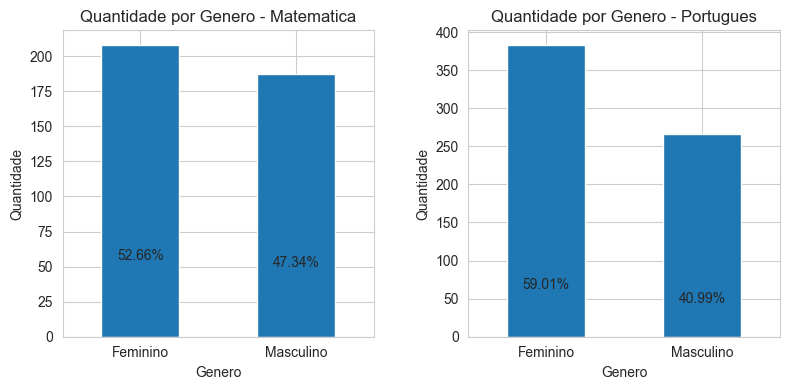

		Gráfico 1 - Barras - Quantidade de cada gênero.


In [11]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

bar_mat = df_mat['sex'].value_counts().reset_index()
percentages = bar_mat['count'] / bar_mat['count'].sum() * 100

bar_mat.plot(kind='bar', x='sex', y='count', ax=axes[0], title='Quantidade por Genero - Matematica', legend=False)

for i in range(0,1):
    for j, percentage in enumerate(percentages):
        axes[i].text(j, percentage, f"{percentage:.2f}%", ha="center", va="bottom")

axes[0].set_xlabel('Genero')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticklabels(["Feminino", "Masculino"], rotation=0)



bar_por = df_por['sex'].value_counts().reset_index()
percentages = bar_por['count'] / bar_por['count'].sum() * 100

bar_por.plot(kind='bar', x='sex', y='count', ax=axes[1], title='Quantidade por Genero - Portugues', legend=False)
axes[1].set_xlabel('Genero')
axes[1].set_ylabel('Quantidade')
axes[1].set_xticklabels(["Feminino", "Masculino"], rotation=0)

for i in range(1,2):
    for j, percentage in enumerate(percentages):
        axes[i].text(j, percentage, f"{percentage:.2f}%", ha="center", va="bottom")


plt.tight_layout(w_pad=3)
plt.show()

print("\t\tGráfico 1 - Barras - Quantidade de cada gênero.")

##### Os 6 histogramas abaixo representam a frequência de cada nota, cada linha representa uma matéria, e cada coluna um trimestre do ano.

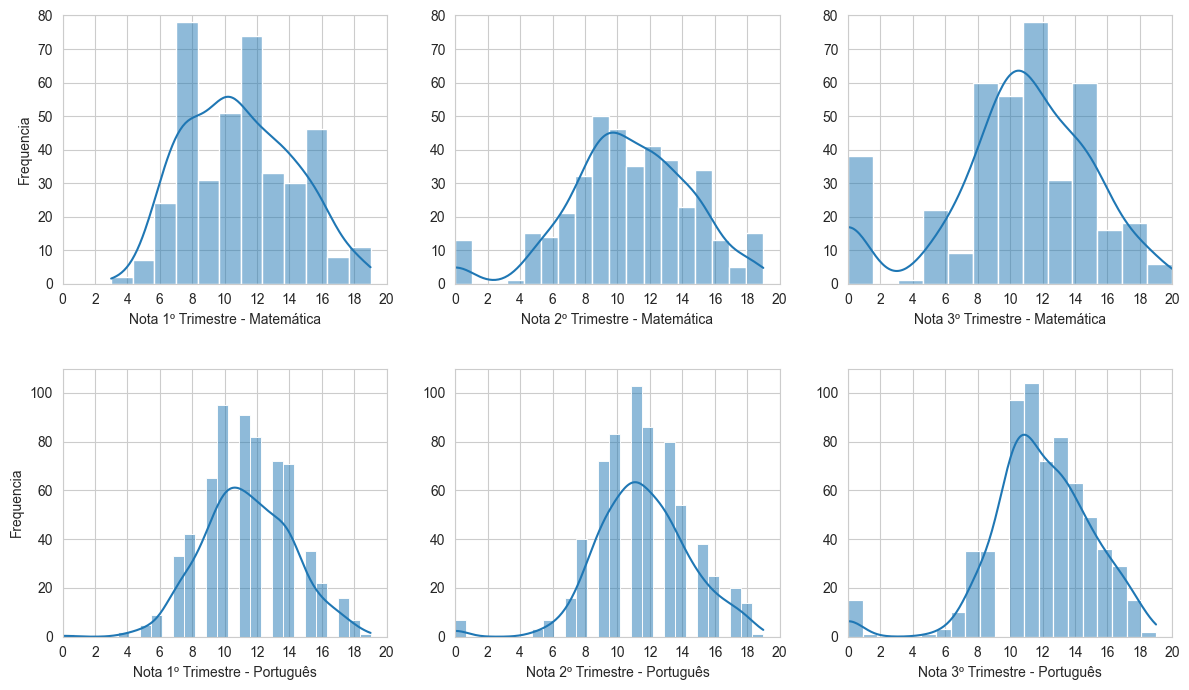

		Gráfico 2 - Histograma - Frequência de cada nota por trimestre.


In [12]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

sns.histplot(df_mat['G1'], kde=True, ax=axes[0][0])
sns.histplot(df_mat['G2'], kde=True, ax=axes[0][1])
sns.histplot(df_mat['G3'], kde=True, ax=axes[0][2])

sns.histplot(df_por['G1'], kde=True, ax=axes[1][0])
sns.histplot(df_por['G2'], kde=True, ax=axes[1][1])
sns.histplot(df_por['G3'], kde=True, ax=axes[1][2])

for i in range(0,2):
    for j in range(0,3):

        if i == 0:
            ylim = 80
            sub = 'Matemática'
        else:
            ylim = 110
            sub = 'Português'

        if j == 0: axes[i][j].set_ylabel("Frequencia")
        else: axes[i][j].set_ylabel("")

        axes[i][j].set_xlabel("Nota "+ str(j+1) +"º Trimestre - " + sub)

        axes[i][j].set_ylim(0, ylim)
        axes[i][j].set_xlim(0, 20)
        axes[i][j].set_xticks(np.arange(0, 21, 2))

for i in range(0, 2):
    for j in range(0, 3):
        label = axes[i][j].get_xticklabels()
        ticks = axes[i][j].get_xticks()
        axes[i][j].set_xticks(ticks)
        axes[i][j].set_xticklabels(label)

plt.tight_layout(h_pad=3, w_pad=2)
plt.show()

print("\t\tGráfico 2 - Histograma - Frequência de cada nota por trimestre.")

##### Podemos concluir que, a quantidade de notas baixas aumentam com o passar do ano para ambas as matérias, porém este aumento é muito mais evidente em matemática. Da qual do 2º para o 3º trimestre, o número de alunos que tiraram nota 0 quase triplicaram.

#### Este aumento significativo em matemática mas não tanto em português, pode ser causado pelos aumento da dificuldade da matéria, ou talvez a metodologia adotada pela escola. Outra análise poderá concluir algo correlacionando isso com alguma outra variável disponível.

#### Abaixo temos um gráfico boxplot da quantidade de faltas dos alunos, com o objetivo de analisar outliers.

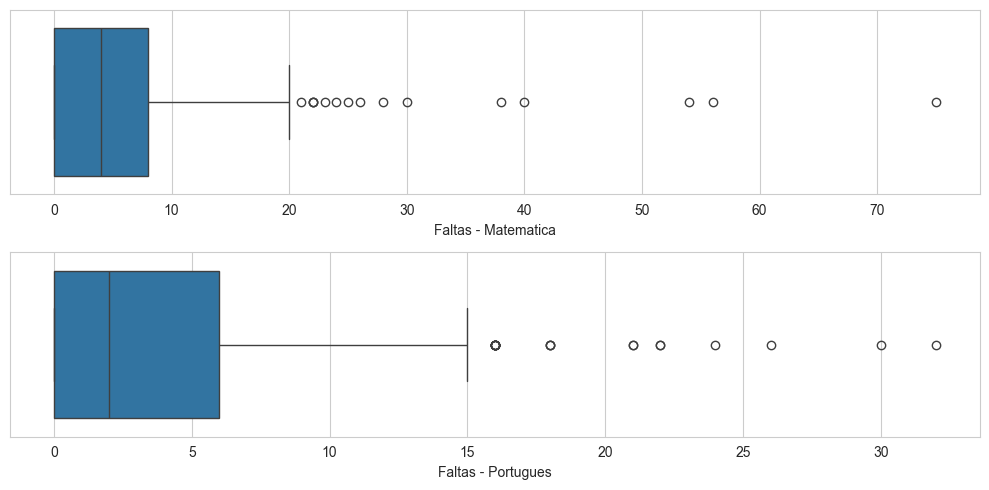

		Gráfico 3 - Boxplot - Outliers de falta.


In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

sns.boxplot(df_mat.absences, orient="h", ax=axes[0])
sns.boxplot(df_por.absences, orient="h", ax=axes[1])

axes[0].set_xlabel("Faltas - Matematica")
axes[1].set_xlabel("Faltas - Portugues")

plt.tight_layout()
plt.show()

print("\t\tGráfico 3 - Boxplot - Outliers de falta.")

#### Podemos tirar duas principais conclusões com os gráficos acima:

1) Alunos faltaram quase duas vezes mais às aulas de matemática do que português.
2) Os alunos que tiveram uma falta muito acima da média, faltaram mais do que o dobro em matemática do que português, ou seja, emquanto temos 2 alunos que faltaram 30 ou 35 vezes me português, temos 5 alunos que faltaram mais de 35, 40, mais de 50 e até mais do que 70 vezes.

#### Essas duas conclusões podem nos ajudar a entender o decaimento das notas de matemática, que embora tanto a nota quanto falta possam consequências de uma outra causa em comum, as faltas tem uma grande chance de ser um fator contribuinte para o decaimento das notas.

## 4.2 - Algumas análises Bivariadas

### 4.2.1 - Relações de Nota vs Algumas variáveis categóricas

##### Tendo uma ideia inicial de como as variáveis se comportam e hipotetizando algumas possíveis causas pra esses comportamentos, vejamos como algumas dessas variáveis se comportam com relação à outras.

##### Para isso, podemos pensar em algumas perguntas iniciais simples, que envolvam a nota e alguma variável categórica e não numérica:

1) Será que há uma diferença entre notas dependendo de onde o aluno mora ?
2) Será que há uma diferença entre notas dependendo de se o aluno teve algum suporte ou aula extra ?
3) Será que há uma diferença entre notas dependendo do tamanho e relação familiar dos alunos ?

##### Vamos alinsar algumas dessas questões utilizando gráficos de sino.

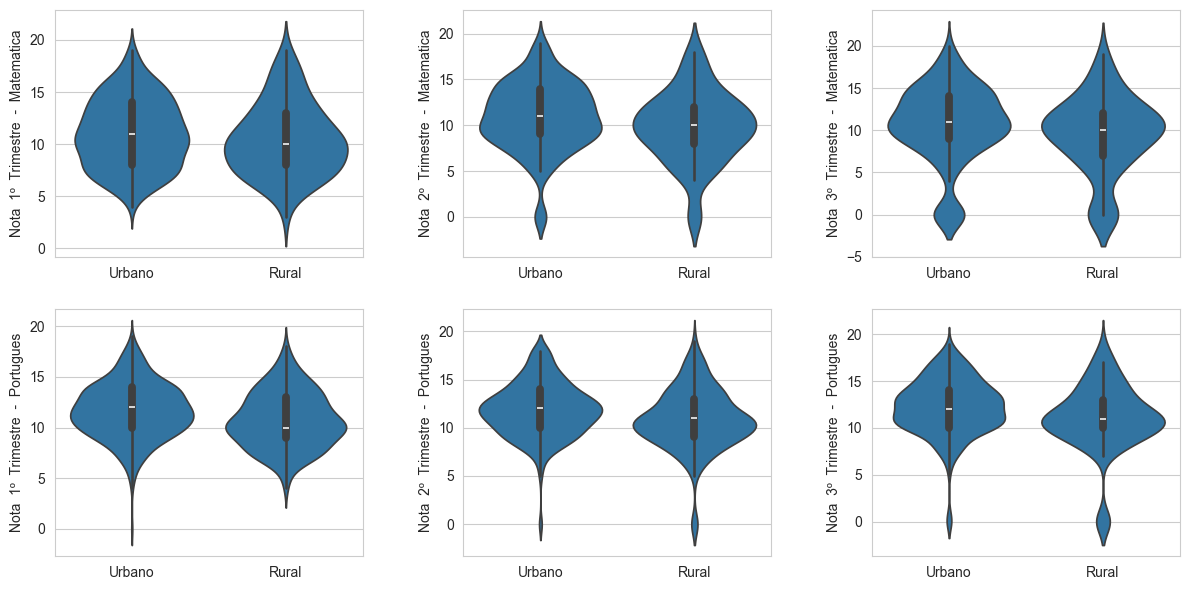

		Gráfico 4 - Violino - Frequência de Notas por tipo de endereço.


In [14]:
showViolinPlot('address')
print("\t\tGráfico 4 - Violino - Frequência de Notas por tipo de endereço.")

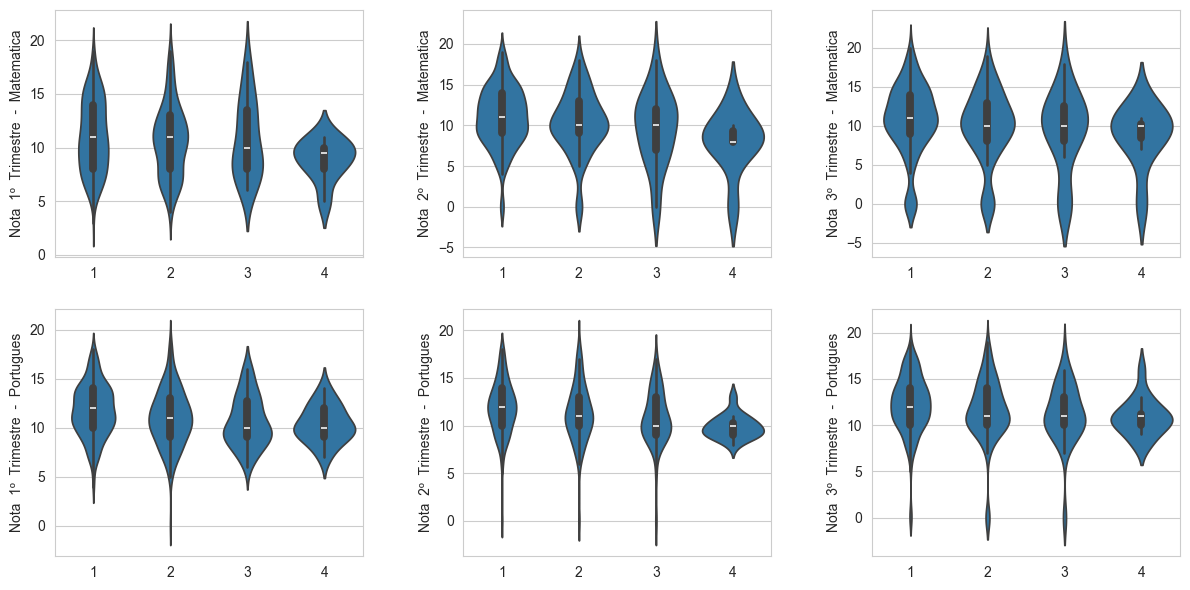

		Gráfico 5 - Violino - Frequência de Notas por tempo de deslocamento.

		1 - Menos de 15 minutos
		2 - 15 a 30 Minutos
		3 - 30 a 60 minutos
		4 - Mais de 60 minutos


In [15]:
showViolinPlot('traveltime')
print("\t\tGráfico 5 - Violino - Frequência de Notas por tempo de deslocamento.")
print("\n\t\t1 - Menos de 15 minutos\n\t\t2 - 15 a 30 Minutos\n\t\t3 - 30 a 60 minutos\n\t\t4 - Mais de 60 minutos")

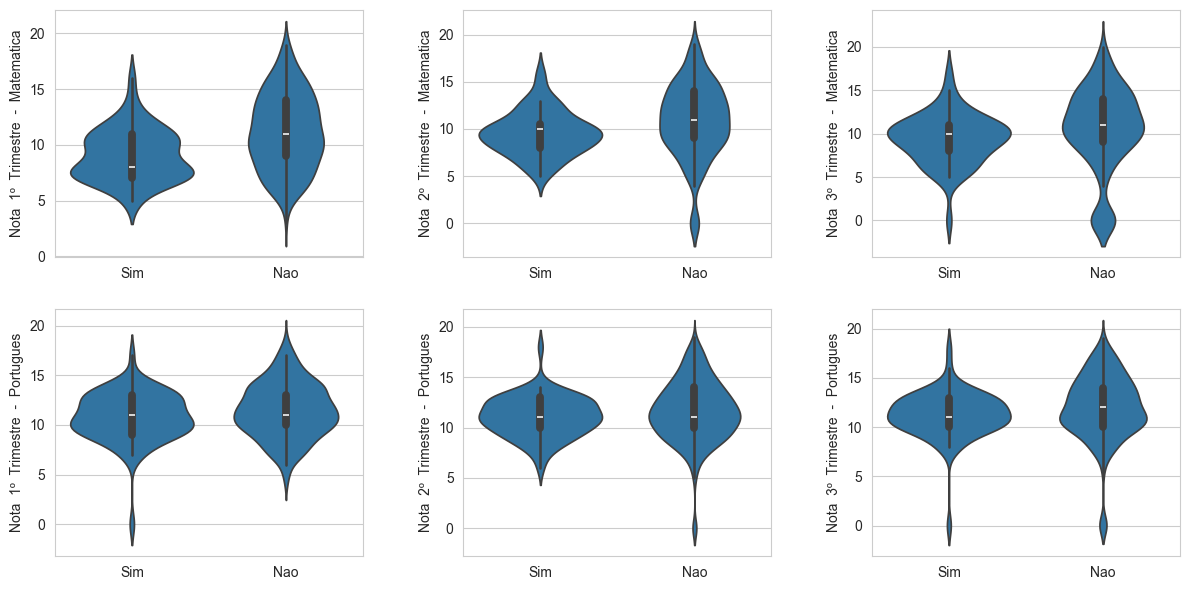

		Gráfico 6 - Violino - Frequência de Notas por suporte educacional.


In [16]:
showViolinPlot('schoolsup')
print("\t\tGráfico 6 - Violino - Frequência de Notas por suporte educacional.")

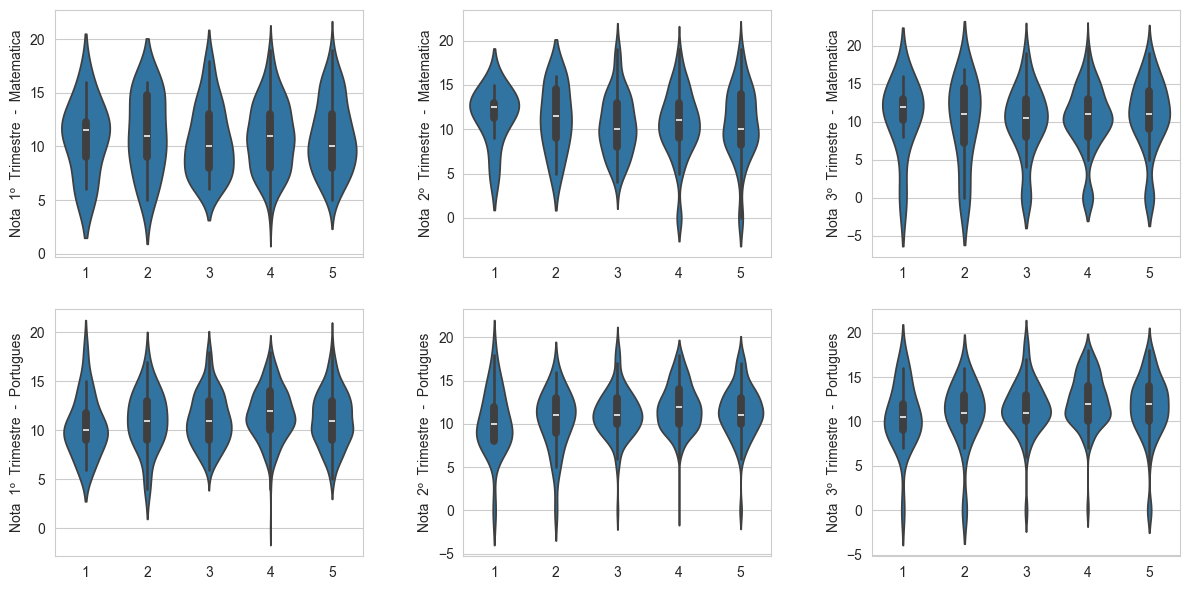

		Gráfico 7 - Violino - Frequência de Notas por relação familiar.

		1 - Muito ruim
		2 - Ruim
		3 - Normal
		4 - Boa
		5 - Excelente


In [17]:
showViolinPlot('famrel')
print("\t\tGráfico 7 - Violino - Frequência de Notas por relação familiar.")
print("\n\t\t1 - Muito ruim\n\t\t2 - Ruim\n\t\t3 - Normal\n\t\t4 - Boa\n\t\t5 - Excelente")

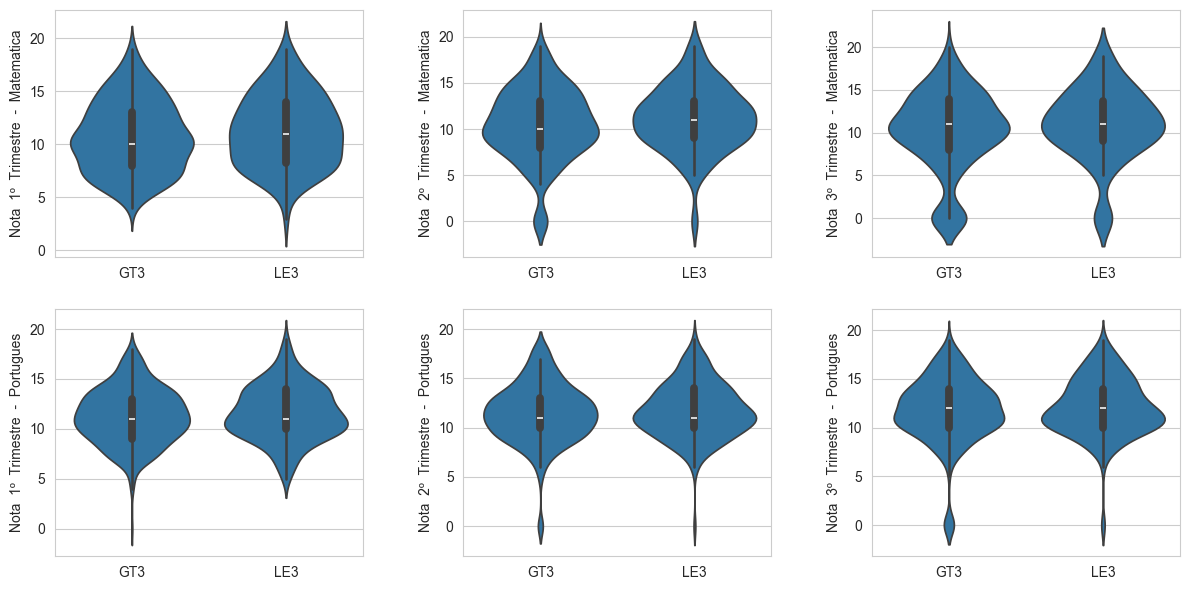

		Gráfico 8 - Violino - Frequência de Notas por tamanho da família.

		LE3 - Menor ou igual a 3 integrantes
		GT3 - Mais que 3 integrantes


In [18]:
showViolinPlot('famsize')
print("\t\tGráfico 8 - Violino - Frequência de Notas por tamanho da família.")
print("\n\t\tLE3 - Menor ou igual a 3 integrantes\n\t\tGT3 - Mais que 3 integrantes")

##### Os gráficos acima nos permitem tirar algumas conclusões:

1) Confirmação de que as notas, em todos os casos, diminuem ao longo do ano, principalmente em matemática.
2) Alunos que moram em zona urbana tendem a ter uma concentração maior de notas acima da média e uma concentração menor de notas baixas *(Gráfico 4)*.
3) Alunos que levam mais tempo se deslocando de casa para a escola tendem a ter notas menores *(Gráfico 5)*.
4) Alunos com suporte educacional extra tendem a concentrar suas notas entre 7.5 e 10, enquanto alunos sem suporte tem uma frequencia de notas mais distribuidas. Porém apenas no começo do ano, do meio para frente, há um aumento de notas baixas e 0 para os alunos sem suporte *(Gráfico 6)*.
5) A relação familiar do aluno interfere muito pouco para as suas notas, alunos com uma boa relação familiar até demonstram ter uma frequência de notas baixas um pouco maior do que alunos com uma má relação familiar *(Gráfico 7)*.
6) Alunos com família maior de 3 pessoas tem uma maior concentração te notas baixas do que alunos com família menor *(Gráfico 8)*.

### 4.2.2 - Correlações das Variáveis numéricas

##### Vimos algumas relações das notas com variáveis categóricas, como as notas se relacionam com variáveis numéricas ? Posto isso, há perguntas que são importantes fazermos, por exemplo:

1) Qual a correlação da nota com a educação dos pais ?
2) Qual a correlação da nota com o numero de faltas ou repetições de ano ?
3) Há uma correlação forte entre outras variáveis sem ser nota ? Essa correlação pode explicar alguma das hipóteses estipuladas até agora ?

##### Fazemos isso calculando a correlação entre uma variável e outra, e gerando um número, variando de -1 a 1.

##### Estes números são então colocados em uma matriz, e cada número é pintado de uma cor diferente, onde é possível saber qual variável se relaciona com qual, e se a correlação é forte ou fraca.

##### ***OBS: O número da correlação, quanto mais próximo de 1, significa uma correlação positiva forte, ou seja são diretamente proporcionais, conforme uma variável sobe, a outra também sobe. Quanto mais próximo de -1, significa uma correlação negativa forte, ou seja inversamente proporcionais, conforme uma variável sobe, a outra desce. E quanto mais próximo de 0, significa que há muito pouca ou nenhuma correlação entre as variáveis.***

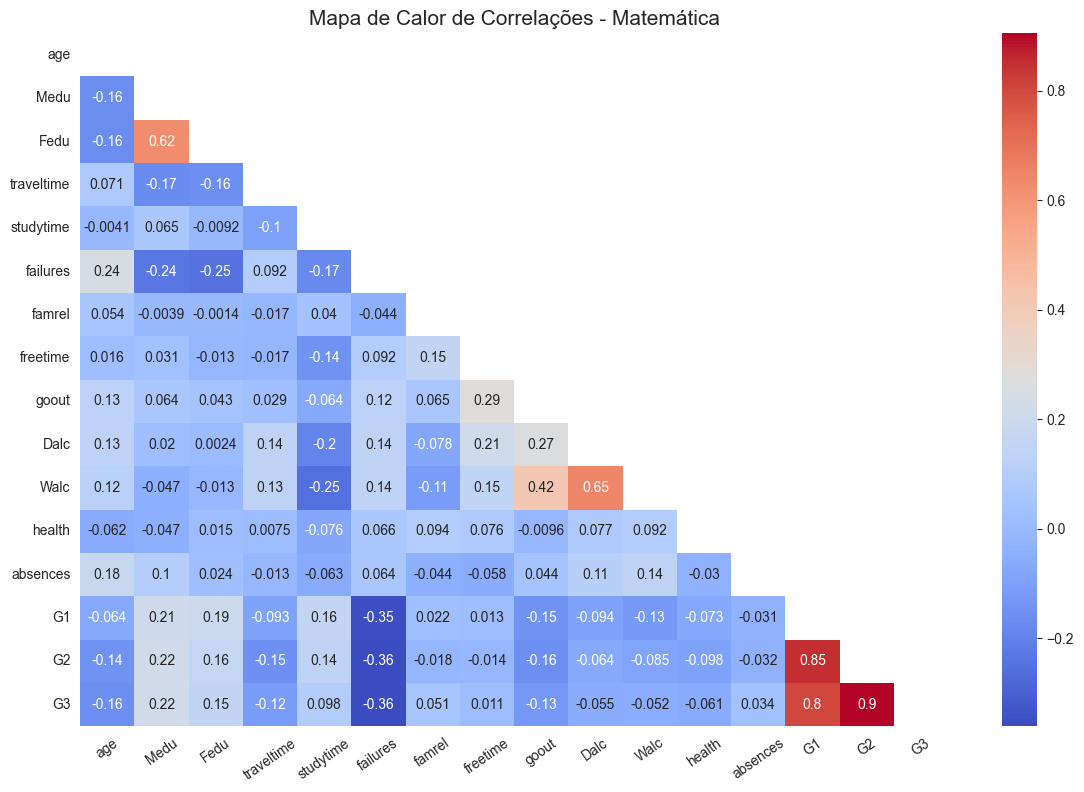

		Gráfico 9 - Mapa de Calor - Correlação das variáveis numéricas de Matemática.


In [19]:
showHeatmap(df_mat, 'Matemática', 'coolwarm')
print("\t\tGráfico 9 - Mapa de Calor - Correlação das variáveis numéricas de Matemática.")

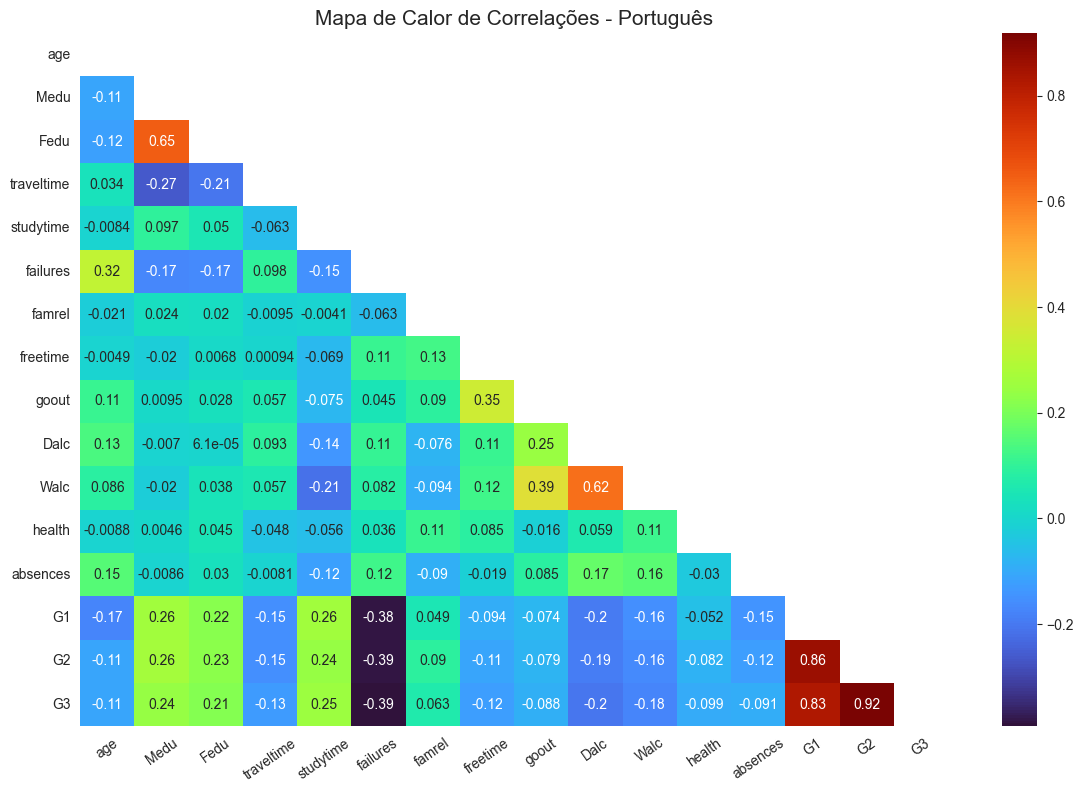

		Gráfico 10 - Mapa de Calor - Correlação das variáveis numéricas de Português.


In [20]:
showHeatmap(df_por, 'Português', 'turbo')
print("\t\tGráfico 10 - Mapa de Calor - Correlação das variáveis numéricas de Português.")

##### Com os mapas de calor acima, vemos alguns pontos interessantes:

1) Há uma correlação positiva entre a educação dos pais e as notas (entre 0.15 e 0.26).
2) Há uma correlação negativa entre a educação dos pais e o tempo que um aluno leva para chegar à escola (entre -0.27 a -0.16).
3) Há uma correlação positiva forte entre as notas, alunos que tiraram notas boas em um trimestre dificilmente tiram notas ruins em outro (entre 0.8 e 0.92).
4) *Confirmamos que quase não há correlação entre notas e relação familiar dos alunos, já que a relação familiar também não está correlacionado com quanto tempo o aluno estuda*.


##### Sobre consumo de álcool

*Há uma correlação negativa entre consumo de alcool e as notas, porém quase não há correlação entre nota e quantas vezes o aluno sai com os amigos para as notas em Português. Esta relação se inverte para as notas de Matemática, da qual quase não há correlação entre consumo de alcool e notas, porém há correlação negativa entre nota e quantas vezes o aluno sai*.

##### Sobre tempo de estudo

*Há uma correlação entre quanto tempo o aluno passa estudando e sua nota, ou seja, quanto mais tempo um aluno passa estudando, maior é a nota. Porém, essa correlação é quase o dobro em Português do que em Matemática. Podendo explicar o maior aumento de notas baixas durante o ano, significando que esta matéria fique bastante difícil com relação ao tempo, de maneira que nem um aluno que passa muito tempo estudando consiga um bom desempenho.*

### 4.2.3 - Comportamento das médias

##### Com as observações vistas anteriormente, vamos colocar em alguns gráficos e tabelas, o comportamento da média das notas em relação à quanto tempo o aluno estuda e à educação dos pais.

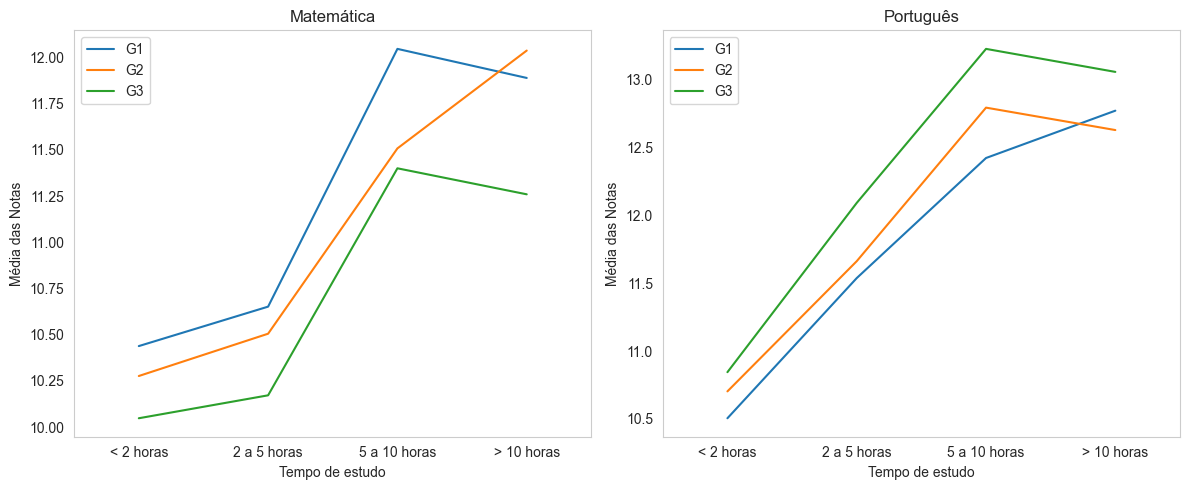

		Gráfico 11 - Linha - Tempo de Estudo por Média de nota.


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

study_time_mat = df_mat.groupby(['studytime'])[['G1', 'G2', 'G3']].mean().rename(index={1: '< 2 horas', 2: '2 a 5 horas', 3: '5 a 10 horas', 4: '> 10 horas'})
study_time_por = df_por.groupby(['studytime'])[['G1', 'G2', 'G3']].mean().rename(index={1: '< 2 horas', 2: '2 a 5 horas', 3: '5 a 10 horas', 4: '> 10 horas'})

groups = [study_time_mat, study_time_por]

for i in range(0,2):
    
    if i%2 == 0: title = 'Matemática'
    else: title = 'Português'
    
    groups[i][['G1', 'G2', 'G3']].plot(kind='line', ax=axes[i], title=title)
    axes[i].set_xlabel('Tempo de estudo')
    axes[i].set_ylabel('Média das Notas')
    axes[i].grid(False)

for j in range(0,2):

    label = axes[j].get_xticklabels()
    ticks = axes[j].get_xticks()
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels(label)

plt.tight_layout()
plt.show()

print("\t\tGráfico 11 - Linha - Tempo de Estudo por Média de nota.")

##### O gráfico acima nos mostra que há um aumento na nota dos alunos que gastam mais tempo estudando, porém há comumente um decréscimo nas notas dos alunos que estudam mais de 10 horas.

##### *Isso explica a diminuição na correlação, porém, com estes dados, não é possível pontuar com exatidão a causa para o fato dos alunos que mais estudam, diminuirem as notas.*

##### Analisemos agora as notas com relação ao nivel educacional dos pais. Abaixo uma tabela com a média das notas de Matemática para cada nível de educação do Pai.

In [22]:
father_ed_prep_mat = df_mat.groupby(['Fedu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Sem escolaridade', 1: 'Ensino Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Ensino Superior'})
father_ed_prep_mat

,G1,G2,G3
Fedu,,,
Sem escolaridade,12.000000,13.000000,13.000000
Ensino Fundamental,9.731707,9.390244,9.158537
Ginásio,11.026087,10.878261,10.260870
Colégio,10.740000,10.750000,10.660000
Ensino Superior,11.927083,11.562500,11.364583


##### Esta tabela nos mostra que conforme o nível educacional dos pais sobe, a nota média dos alunos aumenta um pouco, porém, há um ponto interessante, vemos que a maior média é justamente obtida por alunos cujo os pais não tem nenhuma escolaridade, por que isso ocorre ?

##### Como a média é um número exato, podemos supor que há apenas 2 ou 1 alunos nesta condição, logo, com uma amostra pequena, irregularidades podem ocorrer, vamos plotar isso em uns gráficos, porém não só de matemática e educação do pai, mas sim todos:

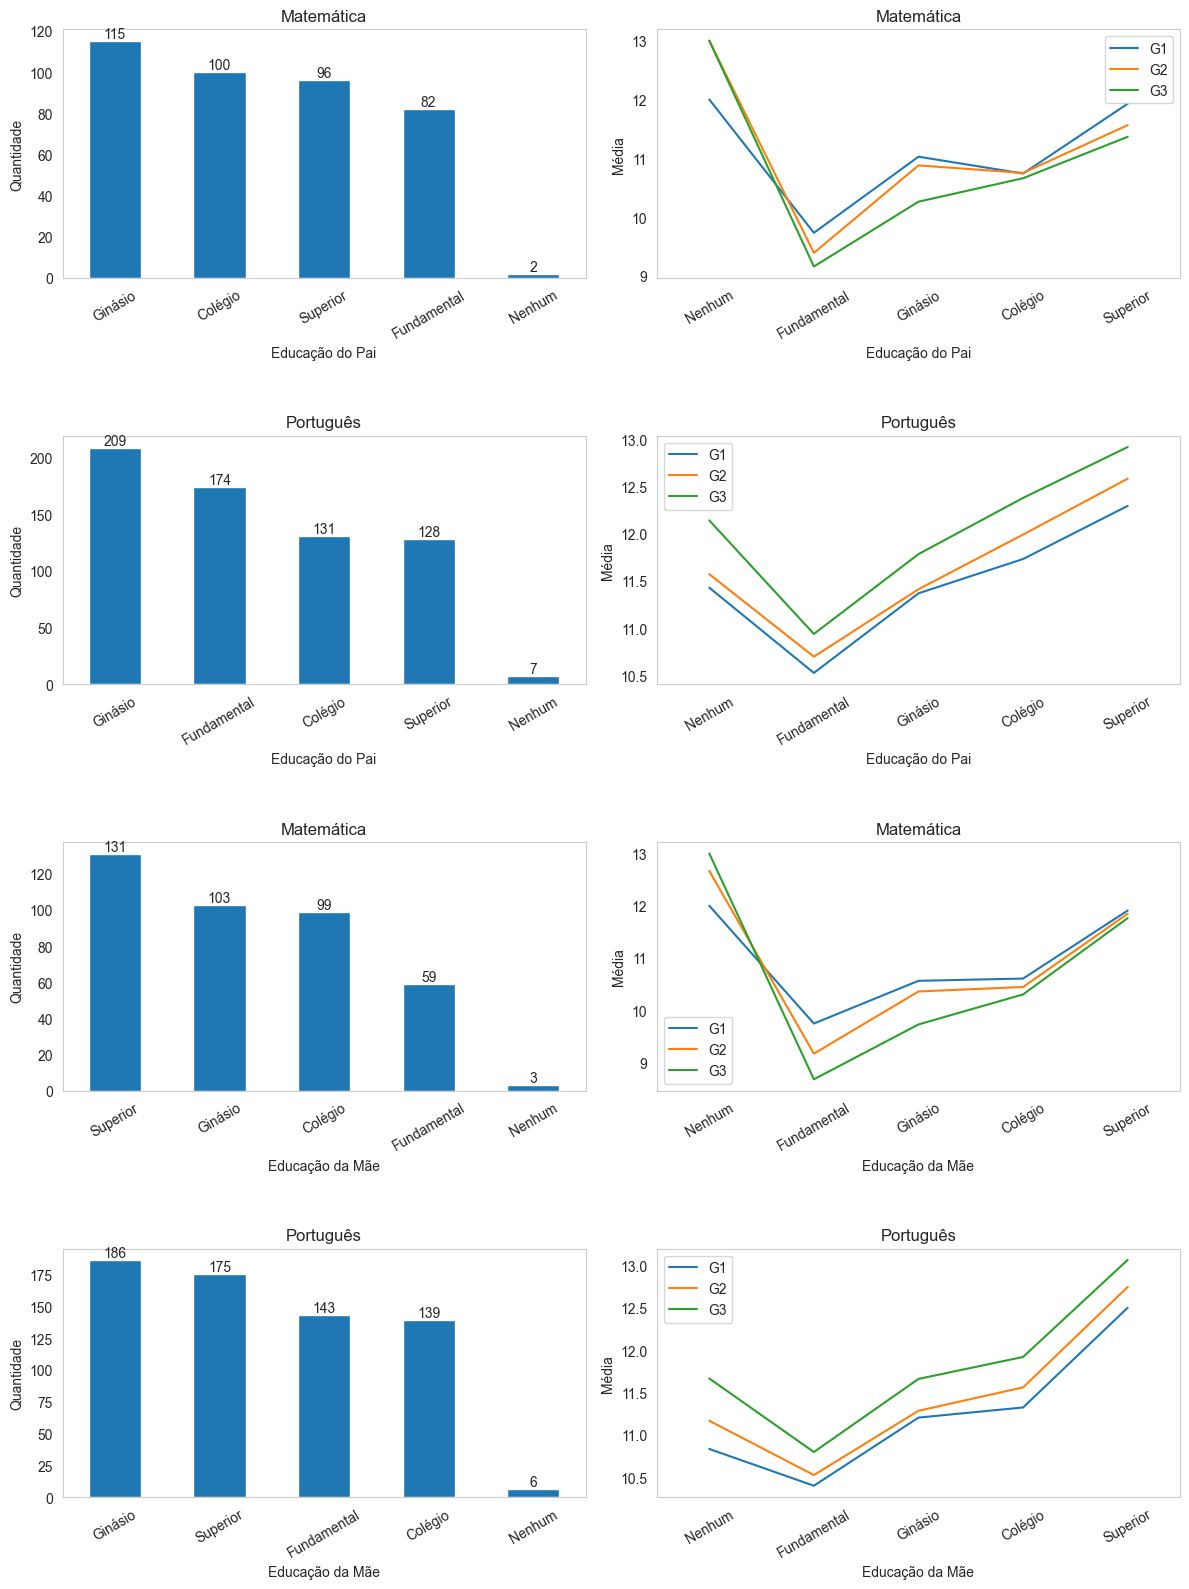

		Gráfico 12 - Barras e Linha - Quantidade de Cada educação de Pai/Mãe e Média de nota por Educação dos pais.


In [23]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

bar_father_mat = df_mat['Fedu'].value_counts().reset_index()
bar_father_por = df_por['Fedu'].value_counts().reset_index()
bar_mother_mat = df_mat['Medu'].value_counts().reset_index()
bar_mother_por = df_por['Medu'].value_counts().reset_index()
bar_father_mat['Fedu'] = bar_father_mat['Fedu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
bar_father_por['Fedu'] = bar_father_por['Fedu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
bar_mother_mat['Medu'] = bar_mother_mat['Medu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
bar_mother_por['Medu'] = bar_mother_por['Medu'].replace({0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
father_ed_prep_mat = df_mat.groupby(['Fedu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
father_ed_prep_por = df_por.groupby(['Fedu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
mother_ed_prep_mat = df_mat.groupby(['Medu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})
mother_ed_prep_por = df_por.groupby(['Medu'])[['G1', 'G2', 'G3']].mean().rename(index={0: 'Nenhum', 1: 'Fundamental', 2: 'Ginásio', 3: 'Colégio', 4: 'Superior'})

bars = [bar_father_mat, bar_father_por, bar_mother_mat, bar_mother_por]
groups = [father_ed_prep_mat, father_ed_prep_por, mother_ed_prep_mat, mother_ed_prep_por]

for i in range(0,4):

    if i in [0,1]:
        parent = 'Fedu'
        label = 'Educação do Pai'
    else:
        parent = 'Medu'
        label = 'Educação da Mãe'
    
    if i%2 == 0: title = 'Matemática'
    else: title = 'Português'
    
    bars[i].plot(kind='bar', x=parent, y='count', ax=axes[i][0], title=title, legend=False)
    axes[i][0].set_xlabel(label)
    axes[i][0].set_ylabel('Quantidade')
    axes[i][0].grid(False)

    for x, value in enumerate(bars[i]['count']):
        axes[i][0].text(x, value, str(value), ha="center", va="bottom")


    groups[i][['G1', 'G2', 'G3']].plot(kind='line', ax=axes[i][1], title=title)
    axes[i][1].set_xlabel(label)
    axes[i][1].set_ylabel('Média')
    axes[i][1].grid(False)

for i in range(0,4):
    for j in range(0,2):

        if j == 1: angle = 30
        else: angle = 30

        label = axes[i][j].get_xticklabels()
        ticks = axes[i][j].get_xticks()
        axes[i][j].set_xticks(ticks)
        axes[i][j].set_xticklabels(label, rotation=angle)

plt.tight_layout(h_pad=4)
plt.show()

print("\t\tGráfico 12 - Barras e Linha - Quantidade de Cada educação de Pai/Mãe e Média de nota por Educação dos pais.")

##### Os gráficos acima corroboram a informação de que uma amostra pequena está elevando a média. Apenas entre 3 e 7 alunos tem pais sem nenhuma escolaridade. Estes pouco alunos coincidentemente tiraram uma nota mais alta, o que fizeram elevar a nota média deste grupo, explicando essa anormalidade.

##### É similar aos casos onde apenas 1 salário de um diretor ou presidente de empresa eleva a média salarial da empresa para um patamar muito alto, não condizente com o salário da grande maioria dos funcionários.

##### Tirando isso, há uma consistência nos dados, em que quanto maior o nível educacional de um pai ou mãe, em média um pouco maior será a nota dos filhos, as notas dos 3 trimestres crescem de maneira quase uniforme, não tendo nenhuma discrepância entre elas.

# 5 - Considerações finais.

### 5.1 - Conclusões e hipóteses.

##### Ao final de tudo, podemos concluir que as notas dos alunos decaem ao longo do ano, este decaimento é mais evidente em Matemática

Isso explica a diminuição na correlação, porém, com estes dados, não é possível pontuar com exatidão a causa para o fato dos alunos que mais estudam, diminuirem as notas.

Como o alcool influencia negativamente nas notas de português, mas não tanto em matemática, o alcool está correlacionado à quanto tempo livre e quantas vezes o aluno sai, e quando somamos ao fato de que, para português, quanto mais tempo um aluno estuda maior a sua nota, porém o tempo de estudo não impacta tanto na nota de matemática.

Tudo isso nos leva a crer que, há um menor tempo de dedicação aos estudos em matemática, e também há uma crescente complexidade na matéria ao longo do ano.

### 5.2 - Propostas.

##### A escola pode implementar a seguinte medida para combater estes problemas:

1) Aumentar interesse do aluno
2) Recompensar esforço

##### Aumentar o interesse do aluno em estudar matemática ao diminuir o foco em decorar fórmulas onde isso ocorre, ao invés, trazer problemas do ambiente do aluno para a sala de aula, mostrando onde tais numeros, fórmulas e metodologias se aplicam ao cotidiano do contexto em que o aluno está inserido, fazendo-o perceber como a matemática se aplica ao seu próprio dia a dia.

##### Recompensar o esforço do aluno, diminuindo um pouco a quantidade e complexidade do conteúdo, ao decorar menos fórmulas e entender mais, o aluno se sente mais recompensado, e consequentemente mais motivado à estudar mais, quando vê que seu entendimento foi convertido em uma nota maior.